<a href="https://colab.research.google.com/github/mayankcircle/statistics_primer/blob/main/Compute_allowed_overbooking_in_Flights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import plotly.graph_objects as go

In [3]:
data = pd.read_csv("Flight.csv")
data.head()

,Passenger_ID,Flight_ID,Arrived
0,1811,A320,1
1,1812,A320,1
2,1813,B777,1
3,1814,B737,1
4,1815,B737,1


In [3]:
data.describe()

,Passenger_ID,Arrived
count,1000.000000,1000.000000
mean,2310.500000,0.902000
std,288.819436,0.297463
min,1811.000000,0.000000
25%,2060.750000,1.000000
50%,2310.500000,1.000000
75%,2560.250000,1.000000
max,2810.000000,1.000000


# Random Variables

*   **Passenger_ID** - Unique ID for each passenger. This is Discrete Random variable (Since they are finite) [Somtimes we can say this is Continuous random variable if range is too much, but mathematically it is Discrete]
*   **Flight_ID** - Unique ID for each flight. This is Discrete Random Variable
*   **Arrived** - 1 means person has arrived for the boarding. It is Discrete Random Variable.



Discrete Random Variable "Arrived" has-


*   Only 2 outcomes - Arrived or not (Similar to SUCCESS / FAILURE)
*   It is Mutual Exclusive and Exhaustive event (The person will either arrive or not (both can not be possible) and both possibilities together made the entire universe)

So, due to above points, we can say- "Arrived" Discrete Random variable is Bernaulli Random Variable.



# Passenger_ID Column



*   It is not having NaN and duplicates values.
*   It means that each record in the data is representing one unique person.



In [9]:
data["Passenger_ID"].isna().any()

False

In [11]:
data["Passenger_ID"].duplicated().any()

False

# Arrived Column

In [4]:
# Unique Values with count
data["Arrived"].value_counts()

1    902
0     98
Name: Arrived, dtype: int64

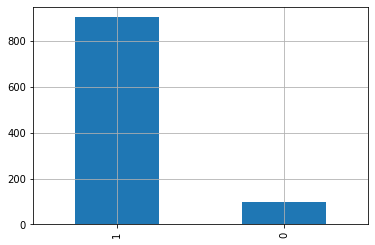

In [5]:
# Bar plot (Unique Values with count)
data["Arrived"].value_counts().plot.bar()
plt.grid()
plt.show()

In [6]:
shows_up_probability = data["Arrived"].value_counts(normalize = True)[1]
shows_up_probability

0.902

**It means the probability for a person to arrive in airport is 0.902**

# Parameters

Lets say, 


*   A flight capacity = 100 seats
*   A ticket price is 5000 Rs
*   If there are extra person for onboarding then Penalty = 10000 Rs per person.



In [7]:
flight_capacity = 100
ticket_price = 5000
PENALTY = 10000

# Analysis

"Arrived" is Non-Uniform distributed Discrete Random Variable. More precisely, it is a Bernaulli Random variable with p = 0.902

Lets say we overbook by 10 people so total booking = flight_capacity + 10 = 110

What is the probability of arriving 101 people @ airport out of 110 booked people? 

This is denoted by x which is a Binomial Random variable with total trails n = 110, prob of success p = 0.902

Note - This prob of success is avg behaviour across all flights and people.

In [22]:
def calculate_expected_penalty(ticket_sold,print_logs = False, draw_plot = False):
  """
  Compute expected penalty per flight by computing -
  Prob of Having 1 penalty i.e (flight_capacity + 1) people arrived out of ticket_sold (let say 110) 
  Prob of Having 2 penalty i.e (flight_capacity + 2) people arrived out of ticket_sold (let say 110) 
  Prob of Having 3 penalty i.e (flight_capacity + 3) people arrived out of ticket_sold (let say 110) 
  etc.

  It returns the total expected penality per flight from above.

  # corner case
  If ticket_sold = 99 and flight_capacity = 100 so obviously no extra person came , means no penalty. 
  So it return 0 as expected penalty per flight

  """

  # For visualization
  overbook_list = []
  prob_list = []


  total_penalty = 0.0
  for i in range(1, ticket_sold - flight_capacity + 1):

    # Compute prob of having i penalty
    ##pmf for k successes, n trials, p=success probab
    prob = stats.binom.pmf(k=flight_capacity+i,n=ticket_sold,p=shows_up_probability) 

    # Cpmpute Expected penality per flight
    penalty = prob * PENALTY * i

    total_penalty += penalty

    if print_logs:
      # print
      print("----> -------------------------------------------------------------------------------------")
      print("----> Prob of arriving ",flight_capacity+i," passengers out of ", ticket_sold, " booked passengers = ",prob)
      print("----> In other words, it is the prob of having ", i, " penalty")
      print("----> Expected Penality per flight = ",penalty)
      print("----> -------------------------------------------------------------------------------------")
    
    if draw_plot:
      overbook_list.append(i)
      prob_list.append(prob)
  
  print("--> Total Penality if we sold total tickets ",ticket_sold," = ",total_penalty)

  if draw_plot:

    visualize(overbook_list,prob_list,ticket_sold)



  return total_penalty

In [27]:
def visualize(x,y,ticket_sold):

  x = [i + flight_capacity for i in x]
  y_axis_title = "Probability of x passengers (seats) came @ airport out of " + str(ticket_sold) + " booked passengers"

  # Use textposition='auto' for direct text
  fig = go.Figure(data=[go.Bar(
              x=x, y=y,
              text=y,
              textposition='auto',
          )])

  fig.update_layout(
      autosize=False,
      width=1200,
      height=600,
      xaxis=dict(
          title_text="Seats with overbooking (Flight Capacity = 100) ",
          tickvals=seats_list
      ),
      yaxis=dict(
          title_text=y_axis_title
      )
  )

  fig.show()

In [28]:
# lets say we sold 130 tickets where capacity of flight is only 100
# so what is the prob distribution of x people came @ airport out of 130 booked passenger
calculate_expected_penalty(130,print_logs = False, draw_plot = True)

--> Total Penality if we sold total tickets  130  =  172600.03655819042


172600.03655819042

**It is Binaomial Distribution and it is always Gaussian (Normal)**

# But we dont know how much we should overbook? So lets do simulation.

In [12]:
# for visualization
seats_list = []
net_sales_list = []

In [21]:
# Lets say, we want to chack till 50 overbooking

for i in range(flight_capacity, flight_capacity + 50):
  
  # Total sales by booking tickets
  sales = ticket_price * i

  # expected penalty 
  total_penalty  = calculate_expected_penalty(i)

  # net sales
  netsales = (sales - total_penalty)

  print("Total seats:",i, ", Net Sales :",round(netsales))

  # for visualization
  seats_list.append(i)
  net_sales_list.append(netsales)

--> Total Penality if we sold total tickets  100  =  0.0
Total seats: 100 , Net Sales : 500000
--> Total Penality if we sold total tickets  101  =  0.2991302209311156
Total seats: 101 , Net Sales : 505000
--> Total Penality if we sold total tickets  102  =  3.529736606987343
Total seats: 102 , Net Sales : 509996
--> Total Penality if we sold total tickets  103  =  21.268218534246554
Total seats: 103 , Net Sales : 514979
--> Total Penality if we sold total tickets  104  =  87.34694176479246
Total seats: 104 , Net Sales : 519913
--> Total Penality if we sold total tickets  105  =  275.4122639241914
Total seats: 105 , Net Sales : 524725
--> Total Penality if we sold total tickets  106  =  712.1350693401445
Total seats: 106 , Net Sales : 529288
--> Total Penality if we sold total tickets  107  =  1575.3054585411628
Total seats: 107 , Net Sales : 533425
--> Total Penality if we sold total tickets  108  =  3071.324062079097
Total seats: 108 , Net Sales : 536929
--> Total Penality if we sold 

In [17]:


x = seats_list
y = net_sales_list

# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=x, y=y,
            text=y,
            textposition='auto',
        )])

fig.update_layout(
    autosize=False,
    width=1200,
    height=600,
    xaxis=dict(
        title_text="Seats with overbooking (Flight Capacity = 100) ",
        tickvals=seats_list
    ),
    yaxis=dict(
        title_text="Net Sales"
    )
)

fig.show()

**At seats = 111, we have highest net sales that is 549.9591k Rs. It means we can overbook by 11 seats per flight.**